# Characterize ATAC-STARR defined active regulatory regions

## Introduction

Here, we will characterize active and silent regions using a suite of analyses. 

## Annotation by TSS

>> loading peak file...				 2021-11-08 03:49:51 PM 
>> preparing features information...		 2021-11-08 03:49:52 PM 
>> identifying nearest features...		 2021-11-08 03:49:53 PM 
>> calculating distance from peak to TSS...	 2021-11-08 03:49:55 PM 
>> assigning genomic annotation...		 2021-11-08 03:49:55 PM 
>> adding gene annotation...			 2021-11-08 03:50:25 PM 


Loading required package: org.Hs.eg.db



'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2021-11-08 03:50:25 PM 
>> done...					 2021-11-08 03:50:25 PM 
>> loading peak file...				 2021-11-08 03:50:25 PM 
>> preparing features information...		 2021-11-08 03:50:25 PM 
>> identifying nearest features...		 2021-11-08 03:50:25 PM 
>> calculating distance from peak to TSS...	 2021-11-08 03:50:26 PM 
>> assigning genomic annotation...		 2021-11-08 03:50:26 PM 
>> adding gene annotation...			 2021-11-08 03:50:30 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2021-11-08 03:50:30 PM 
>> done...					 2021-11-08 03:50:30 PM 
>> loading peak file...				 2021-11-08 03:50:30 PM 
>> preparing features information...		 2021-11-08 03:50:32 PM 
>> identifying nearest features...		 2021-11-08 03:50:32 PM 
>> calculating distance from peak to TSS...	 2021-11-08 03:50:34 PM 
>> assigning genomic annotation...		 2021-11-08 03:50:34 PM 
>> adding gene annotation...			 2021-11-08 03:50:40 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2021-11-08 03:50:40 PM 
>> done...					 2021-11-08 03:50:40 PM 


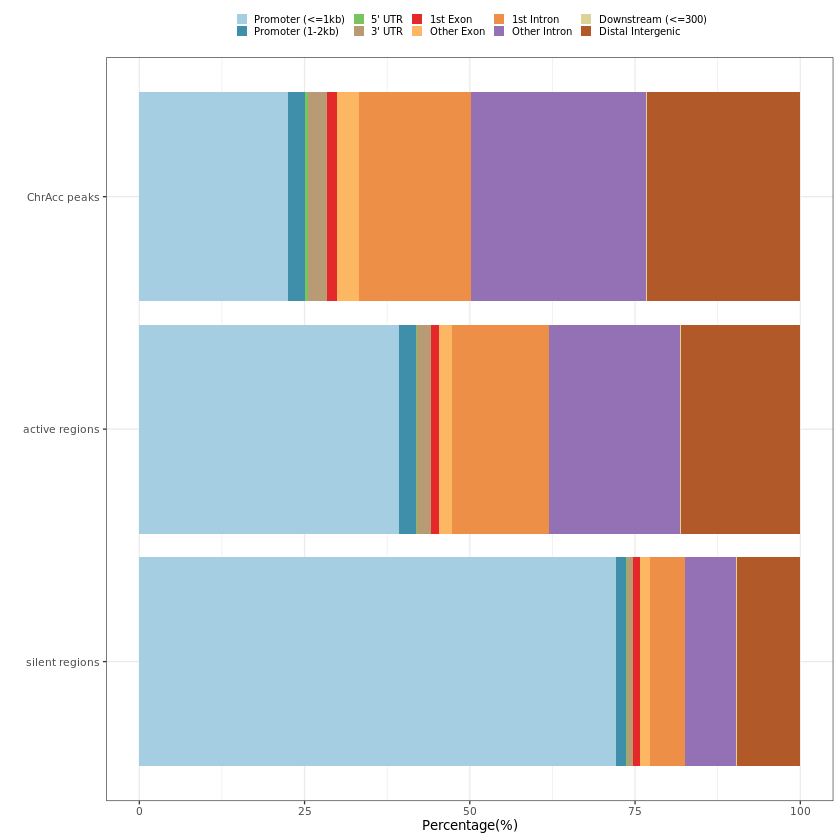

In [6]:
library(tidyverse)
library(ChIPseeker)
library(TxDb.Hsapiens.UCSC.hg38.knownGene)

data_dir <- "/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR"

active <- annotatePeak(paste0(data_dir, "/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/active_regions.bed"), 
                       tssRegion = c(-2000, 1000), TxDb = TxDb.Hsapiens.UCSC.hg38.knownGene, 
                       annoDb = "org.Hs.eg.db", flankDistance = 5000)

silent <- annotatePeak(paste0(data_dir, "/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/silent_regions.bed"), 
                       tssRegion = c(-2000, 1000), TxDb = TxDb.Hsapiens.UCSC.hg38.knownGene, 
                       annoDb = "org.Hs.eg.db", flankDistance = 5000)

ocr <- annotatePeak(paste0(data_dir, "/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak"), 
                    tssRegion = c(-2000, 1000), TxDb = TxDb.Hsapiens.UCSC.hg38.knownGene, 
                    annoDb = "org.Hs.eg.db", flankDistance = 5000)

bar <- plotAnnoBar(list(`ChrAcc peaks`=ocr, `active regions`=active, `silent regions`=silent)) + theme_bw(base_size = 8, base_family = "Arial") + theme(legend.key.size = unit(0.1, "in"), legend.title = element_blank(), plot.title = element_blank(), legend.position = "top", legend.text = element_text(size = 6)) 

bar

In [7]:
res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(bar, filename = paste0(res, "/regulatory-regions_TSS-annotation.pdf"), device = cairo_pdf, width = 4, height = 2)

## Functional Annotation by ChromHMM

In [1]:
%%bash

#BedFiles
CHMM_DIR='/data/hodges_lab/public_data/GM12878/obtained_as_processed_files'
AS_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink'
OCR_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks'

#Output
OUTPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/AS-regions_chromHMM-assignment'

#active
bedtools intersect -u -a ${CHMM_DIR}/GM12878_ChromHMM_18-state_E116_18_core_K27ac_hg38lift_mnemonics.bed \
    -b ${AS_DIR}/active_regions.bed > ${OUTPUT_DIR}/GM12878inGM12878_active_0.1padj_50-bin_ChromHMM.bed

#silent
bedtools intersect -u -a ${CHMM_DIR}/GM12878_ChromHMM_18-state_E116_18_core_K27ac_hg38lift_mnemonics.bed \
    -b ${AS_DIR}/silent_regions.bed > ${OUTPUT_DIR}/GM12878inGM12878_silent_0.1padj_50-bin_ChromHMM.bed

#OCRs
bedtools intersect -u -a ${CHMM_DIR}/GM12878_ChromHMM_18-state_E116_18_core_K27ac_hg38lift_mnemonics.bed \
    -b ${OCR_DIR}/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak > ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_0.0001-qvalue_ChromHMM.bed

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


── Column specification ────────────────────────────────────────────────────────
cols(
  Chr = col_character(),
  Start = col_double(),
  End = col_double(),
  Chrom_HMM_State = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Chr = col_character(),
  Start = col_double(),
  End = col_double(),
  Chrom_HMM_State = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Chr = col_character(),
  Start = col_double(),
  End = col_double(),
  Chrom_HMM_State = col_character()
)




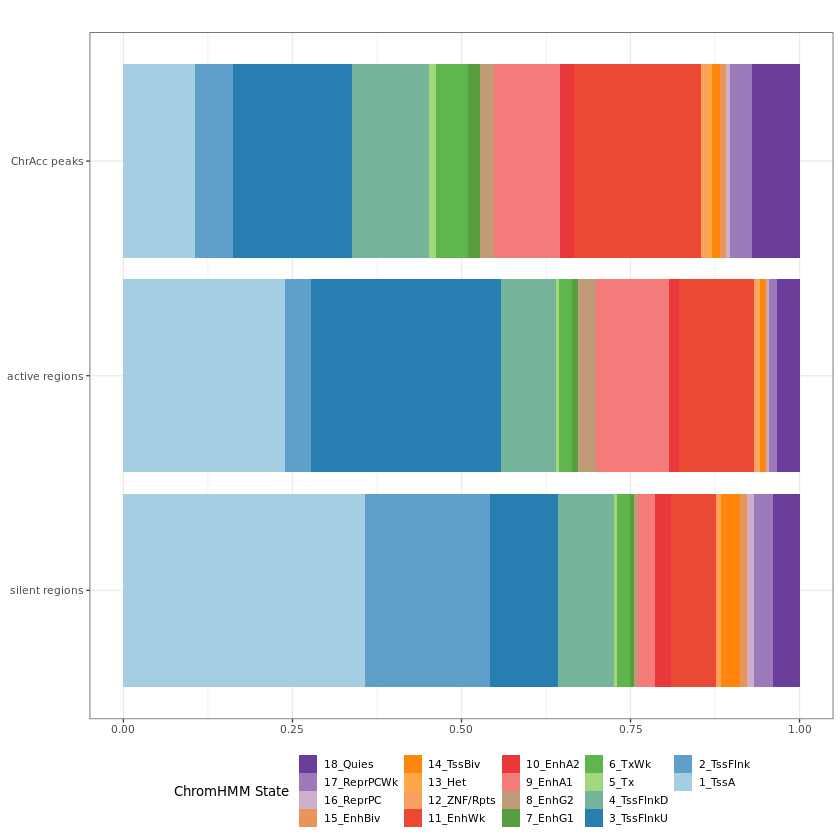

In [1]:
library(tidyverse)
library(ggrepel)
library(RColorBrewer)
library(pals)

dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/AS-regions_chromHMM-assignment'

#Read_tsvs
active <- read_tsv(paste0(dir, "/GM12878inGM12878_active_0.1padj_50-bin_ChromHMM.bed"), 
    col_names = c("Chr", "Start", "End", "Chrom_HMM_State")) %>% mutate(Type="active regions")

silent <- read_tsv(paste0(dir, "/GM12878inGM12878_silent_0.1padj_50-bin_ChromHMM.bed"), 
    col_names = c("Chr", "Start", "End", "Chrom_HMM_State")) %>% mutate(Type="silent regions")

OCRs <- read_tsv(paste0(dir, "/GM12878inGM12878_DNA_genrich_0.0001-qvalue_ChromHMM.bed"), 
    col_names = c("Chr", "Start", "End", "Chrom_HMM_State")) %>% mutate(Type="ChrAcc peaks")

#wrangle tsvs
tsv <- bind_rows(active, silent, OCRs)
tsv$Type <- factor(tsv$Type, levels = c("silent regions", "active regions", "ChrAcc peaks"))
tsv_tally <- group_by(tsv, Chrom_HMM_State, Type) %>% tally()
tsv_tally$Chrom_HMM_State <- factor(tsv_tally$Chrom_HMM_State, 
                                    levels = c("1_TssA", "2_TssFlnk", "3_TssFlnkU", "4_TssFlnkD", 
                                               "5_Tx", "6_TxWk", "7_EnhG1", "8_EnhG2", "9_EnhA1", 
                                               "10_EnhA2", "11_EnhWk", "12_ZNF/Rpts", "13_Het", 
                                               "14_TssBiv", "15_EnhBiv", "16_ReprPC", "17_ReprPCWk", 
                                               "18_Quies")) %>% fct_rev()

#define color palette
nb.cols <- 18
mycolors <- colorRampPalette(rev(brewer.pal(10, "Paired")))(nb.cols) 

bar <- ggplot(tsv_tally, aes(y = Type, x = n, fill = Chrom_HMM_State)) + 
  geom_bar(width = 0.9, stat = "identity", size = 0, position = "fill") +
  scale_fill_manual(values = mycolors) +
  ggtitle("") +
  labs(fill="ChromHMM State") +
  theme_bw(base_family = "Arial", base_size = 8) +
  theme(legend.position = "bottom", legend.key.size = unit(0.15, "inches"), plot.title = element_text(hjust = 0.5, face = "bold", size = 12), axis.title = element_blank()) 

bar

In [2]:
res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(bar, filename = paste0(res, "/regulatory-regions_ChromHMM-annotation.pdf"), device = cairo_pdf, width = 4, height = 2.25)

## Heatmap of Regulatory Activity with ENCODE ChIP-seq signal

### Generate regulatory activity signal file

In [2]:
%%bash
#Paths
BAM_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams'
OUTPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/AS-activity_signal/log2_inOCRs'

In [4]:
%%bash
#merge replicates
samtools merge -@ 4 -f ${BAM_DIR}/merged_replicates/GM12878inGM12878_DNA_merged.filtered.pos-sorted.bam \
    ${BAM_DIR}/individual_replicates/GM12878inGM12878_DNA_Rep1.filtered.pos-sorted.bam \
    ${BAM_DIR}/individual_replicates/GM12878inGM12878_DNA_Rep2.filtered.pos-sorted.bam \
    ${BAM_DIR}/individual_replicates/GM12878inGM12878_DNA_Rep3.filtered.pos-sorted.bam

samtools merge -@ 4 -f ${BAM_DIR}/merged_replicates/GM12878inGM12878_RNA_merged.filtered.pos-sorted.bam \
    ${BAM_DIR}/individual_replicates/GM12878inGM12878_RNA_Rep1.filtered.pos-sorted.bam \
    ${BAM_DIR}/individual_replicates/GM12878inGM12878_RNA_Rep2.filtered.pos-sorted.bam \
    ${BAM_DIR}/individual_replicates/GM12878inGM12878_RNA_Rep3.filtered.pos-sorted.bam    

In [6]:
%%bash
#Index the files
samtools index -@ 4 ${BAM_DIR}/merged_replicates/GM12878inGM12878_DNA_merged.filtered.pos-sorted.bam \
    ${BAM_DIR}/merged_replicates/GM12878inGM12878_DNA_merged.filtered.pos-sorted.bam.bai

samtools index -@ 4 ${BAM_DIR}/merged_replicates/GM12878inGM12878_RNA_merged.filtered.pos-sorted.bam \
    ${BAM_DIR}/merged_replicates/GM12878inGM12878_RNA_merged.filtered.pos-sorted.bam.bai

In [7]:
%%bash
#make bedGraphs, cpm normalize
bamCoverage -b ${BAM_DIR}/merged_replicates/GM12878inGM12878_DNA_merged.filtered.pos-sorted.bam -o ${OUTPUT_DIR}/GM12878inGM12878_DNA_merged.bw \
    -bs 10 --normalizeUsing CPM -p 4
bamCoverage -b ${BAM_DIR}/merged_replicates/GM12878inGM12878_RNA_merged.filtered.pos-sorted.bam -o ${OUTPUT_DIR}/GM12878inGM12878_RNA_merged.bw \
    -bs 10 --normalizeUsing CPM -p 4

normalization: CPM
bamFilesList: ['/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/merged_replicates/GM12878inGM12878_DNA_merged.filtered.pos-sorted.bam']
binLength: 1
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
genomeChunkSize: None
defaultFragmentLength: 107
numberOfProcessors: 4
verbose: False
region: None
bedFile: None
minMappingQuality: None
ignoreDuplicates: False
chrsToSkip: []
stepSize: 1
center_read: True
samFlag_include: None
samFlag_exclude: None
minFragmentLength: 0
maxFragmentLength: 0
zerosToNans: False
smoothLength: None
save_data: False
out_file_for_raw_data: None
maxPairedFragmentLength: 428
normalization: CPM
bamFilesList: ['/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/merged_replicates/GM12878inGM12878_RNA_merged.filtered.pos-sorted.bam']
binLength: 1
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
genomeChunkSize: None
defaultFragmentLength: 117
numberOfProcess

In [3]:
%%bash
#compare bigwigs. This takes a long time. 
bigwigCompare -b1 ${OUTPUT_DIR}/GM12878inGM12878_RNA_merged.bw -b2 ${OUTPUT_DIR}/GM12878inGM12878_DNA_merged.bw \
    -of bigwig -o ${OUTPUT_DIR}/GM12878inGM12878_activity_merged_intersected-OCRs.bw -p 12 --operation log2 --pseudocount 1 --skipZeroOverZero

### Split regulatory regions into distal and proximal

In [5]:
#split active and silent regions into active and silent. 
library(tidyverse)
library(ChIPseeker)
library(TxDb.Hsapiens.UCSC.hg38.knownGene)

data_dir <- "/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink"

In [6]:
#Annotate then convert annotation to df. 
#Also subtract 1 from start position because ChIPseeker stupidly changes only the start position to 1-based coordinate system. 
active <- annotatePeak(paste0(data_dir, "/active_regions.bed"), 
                       tssRegion = c(-2000, 1000), TxDb = TxDb.Hsapiens.UCSC.hg38.knownGene, 
                       annoDb = "org.Hs.eg.db", flankDistance = 5000) %>% as.data.frame() %>% mutate(start = (start-1))

#Split annotated active peaks into proximal and distal subsets and format into a bed. Assign GeneID (entrez) in 7th column. 
active_proximal <- filter(active, str_detect(annotation, 'Promoter')) %>% 
    dplyr::select(seqnames, start, end, V4, V5, V6) %>% arrange(seqnames, start, end)
    
active_distal <- filter(active, !str_detect(annotation, 'Promoter')) %>% 
    dplyr::select(seqnames, start, end, V4, V5, V6) %>% arrange(seqnames, start, end)

#Save parsed bed files. 
write_tsv(x = active_proximal, file = paste0(data_dir, "/active_regions_proximal.bed"), col_names = FALSE)
write_tsv(x = active_distal, file = paste0(data_dir, "/active_regions_distal.bed"), col_names = FALSE)

>> loading peak file...				 2021-11-08 03:53:03 PM 
>> preparing features information...		 2021-11-08 03:53:04 PM 
>> identifying nearest features...		 2021-11-08 03:53:05 PM 
>> calculating distance from peak to TSS...	 2021-11-08 03:53:06 PM 
>> assigning genomic annotation...		 2021-11-08 03:53:06 PM 
>> adding gene annotation...			 2021-11-08 03:53:41 PM 


Loading required package: org.Hs.eg.db



'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2021-11-08 03:53:41 PM 
>> done...					 2021-11-08 03:53:41 PM 


In [7]:
#Repeat for silent
silent <- annotatePeak(paste0(data_dir, "/silent_regions.bed"), 
                       tssRegion = c(-2000, 1000), TxDb = TxDb.Hsapiens.UCSC.hg38.knownGene, 
                       annoDb = "org.Hs.eg.db", flankDistance = 5000) %>% as.data.frame() %>% mutate(start = (start-1))

silent_proximal <- filter(silent, str_detect(annotation, 'Promoter')) %>% 
    dplyr::select(seqnames, start, end, V4, V5, V6) %>% arrange(seqnames, start, end)
    
silent_distal <- filter(silent, !str_detect(annotation, 'Promoter')) %>% 
    dplyr::select(seqnames, start, end, V4, V5, V6) %>% arrange(seqnames, start, end)

write_tsv(x = silent_proximal, file = paste0(data_dir, "/silent_regions_proximal.bed"), col_names = FALSE)
write_tsv(x = silent_distal, file = paste0(data_dir, "/silent_regions_distal.bed"), col_names = FALSE)

>> loading peak file...				 2021-11-08 03:53:50 PM 
>> preparing features information...		 2021-11-08 03:53:50 PM 
>> identifying nearest features...		 2021-11-08 03:53:50 PM 
>> calculating distance from peak to TSS...	 2021-11-08 03:53:50 PM 
>> assigning genomic annotation...		 2021-11-08 03:53:50 PM 
>> adding gene annotation...			 2021-11-08 03:53:55 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2021-11-08 03:53:55 PM 
>> done...					 2021-11-08 03:53:55 PM 


### Generate Heatmaps

In [1]:
%%bash
BED_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink'
ENCODE_DIR='/data/hodges_lab/public_data/GM12878/obtained_as_processed_files/from-ENCODE/bigWig'
AS_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/activity_bigwigs'
RES_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/AS-region_ENCODE-signal-heatmaps'

#compute matricies:
#Distal regulatory regions. 
computeMatrix reference-point -S ${AS_DIR}/GM12878inGM12878_merged_RNA-to-DNA_log2.bw \
    ${ENCODE_DIR}/GM12878_EP300_hg38_ENCFF928OAA.bw \
    ${ENCODE_DIR}/GM12878_H3K27ac_ChIP_hg38_ENCFF469WVA.bw \
    ${ENCODE_DIR}/GM12878_H3K4me1_ChIP_hg38_ENCFF564KBE.bw \
    ${ENCODE_DIR}/GM12878_H3K4me3_ChIP_hg38_ENCFF280PUF.bw \
    ${ENCODE_DIR}/GM12878_H3K27me3_ChIP_hg38_ENCFF919DOR.bw \
    ${ENCODE_DIR}/GM12878_CTCF_ChIP_hg38_ENCFF485CGE.bw \
    -R ${BED_DIR}/active_regions_distal.bed ${BED_DIR}/silent_regions_distal.bed \
    -a 2000 -b 2000 --referencePoint center --binSize 10 -p 12 --missingDataAsZero \
    -o ${RES_DIR}/matrix_GM12878_distal.gz


The following chromosome names did not match between the bigwig files
chromosome	length
chrUn_KI270519v1	    138126
chr22_KI270736v1_random	    181920
chrUn_KI270754v1	     40191
chr22_KI270735v1_random	     42811
chrUn_KI270417v1	      2043
           chrY	  57227415
chr5_GL000208v1_random	     92689
chrUn_KI270378v1	      1048
chrUn_KI270317v1	     37690
chrUn_KI270425v1	      1884
chr14_GL000194v1_random	    191469
chrUn_KI270442v1	    392061
chrUn_KI270337v1	      1121
chrUn_KI270420v1	      2321
chrUn_KI270366v1	      8320
chrUn_KI270438v1	    112505
chrUn_KI270745v1	     41891
chrUn_KI270302v1	      2274
chr1_KI270708v1_random	    127682
chrUn_KI270508v1	      1951
chrUn_KI270466v1	      1233
chrUn_KI270515v1	      6361
chrUn_KI270741v1	    157432
chrUn_KI270468v1	      4055
chrUn_KI270517v1	      3253
chr3_GL000221v1_random	    155397
chr9_KI270719v1_random	    176845
chrUn_KI270333v1	      2699
chrUn_KI270743v1	    210658
chrUn_KI270588v1	      6158
chr1_KI270706v1_random	    

In [1]:
%%bash
#Proximal regulatory regions.
BED_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink'
ENCODE_DIR='/data/hodges_lab/public_data/GM12878/obtained_as_processed_files/from-ENCODE/bigWig'
AS_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/activity_bigwigs'
RES_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/AS-region_ENCODE-signal-heatmaps'

computeMatrix reference-point -S ${AS_DIR}/GM12878inGM12878_merged_RNA-to-DNA_log2.bw \
    ${ENCODE_DIR}/GM12878_EP300_hg38_ENCFF928OAA.bw \
    ${ENCODE_DIR}/GM12878_H3K27ac_ChIP_hg38_ENCFF469WVA.bw \
    ${ENCODE_DIR}/GM12878_H3K4me1_ChIP_hg38_ENCFF564KBE.bw \
    ${ENCODE_DIR}/GM12878_H3K4me3_ChIP_hg38_ENCFF280PUF.bw \
    ${ENCODE_DIR}/GM12878_H3K27me3_ChIP_hg38_ENCFF919DOR.bw \
    ${ENCODE_DIR}/GM12878_CTCF_ChIP_hg38_ENCFF485CGE.bw \
    -R ${BED_DIR}/active_regions_proximal.bed ${BED_DIR}/silent_regions_proximal.bed \
    -a 2000 -b 2000 --referencePoint center --binSize 10 -p 12 --missingDataAsZero \
    -o ${RES_DIR}/matrix_GM12878_proximal.gz


The following chromosome names did not match between the bigwig files
chromosome	length
chrUn_KI270582v1	      6504
chrUn_KI270507v1	      5353
chrUn_GL000220v1	    161802
chr22_KI270731v1_random	    150754
chrUn_KI270516v1	      1300
chrUn_KI270521v1	      7642
chrUn_KI270579v1	     31033
chrUn_KI270750v1	    148850
chrUn_KI270385v1	       990
chrUn_KI270467v1	      3920
chrUn_KI270745v1	     41891
chrUn_KI270303v1	      1942
           chrY	  57227415
chr9_KI270718v1_random	     38054
chrUn_KI270509v1	      2318
chrUn_KI270305v1	      1472
chr6_GL000251v2_alt	   4795265
chrUn_GL000213v1	    164239
chrUn_KI270751v1	    150742
           chrM	     16569
chrUn_KI270511v1	      8127
chrUn_KI270512v1	     22689
chrUn_KI270741v1	    157432
chr15_KI270727v1_random	    448248
chr22_KI270734v1_random	    165050
chr4_GL000008v2_random	    209709
chr14_KI270725v1_random	    172810
chrUn_KI270424v1	      2140
chrUn_KI270590v1	      4685
chrUn_KI270749v1	    158759
chr9_KI270717v1_random	     40

In [2]:
%%bash
RES_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/AS-region_ENCODE-signal-heatmaps'

#plot heatmap from matricies. Rank regions by activity intensity.
#distal
plotHeatmap -m ${RES_DIR}/matrix_GM12878_distal.gz -o ${RES_DIR}/heatmap_GM12878_distal.pdf \
    --dpi 300 --plotFileFormat pdf --sortUsing mean --sortUsingSamples 1 \
    --outFileSortedRegions ${RES_DIR}/sorted_GM12878_distal.bed --heatmapHeight 20 --refPointLabel center \
    --yAxisLabel "Distal" --regionsLabel "active" "silent" \
    --samplesLabel "activity" "EP300" "H3K27ac" "H3K4me1" "H3K4me3" "H3K27me3" "CTCF" \
    --zMin -1 0 0 0 0 0 0 --zMax 1 5 30 10 40 2 5 --yMin -2 0 0 0 0 0 0 --yMax 2 5 30 10 40 2 10 \
    --colorMap RdBu Blues Blues Blues Blues Reds Reds

Samples used for ordering within each group:  [0]


In [3]:
%%bash
RES_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/AS-region_ENCODE-signal-heatmaps'

#proximal
plotHeatmap -m ${RES_DIR}/matrix_GM12878_proximal.gz -o ${RES_DIR}/heatmap_GM12878_proximal.pdf \
    --dpi 300 --plotFileFormat pdf --sortUsing mean --sortUsingSamples 1 \
    --outFileSortedRegions ${RES_DIR}/sorted_GM12878_proximal.bed --heatmapHeight 20 --refPointLabel center \
    --yAxisLabel "Proximal" --regionsLabel "active" "silent" \
    --samplesLabel "activity" "EP300" "H3K27ac" "H3K4me1" "H3K4me3" "H3K27me3" "CTCF" \
    --zMin -1 0 0 0 0 0 0 --zMax 1 5 30 10 40 2 5 --yMin -2 0 0 0 0 0 0 --yMax 2 5 30 10 40 2 10 \
    --colorMap RdBu Blues Blues Blues Blues Reds Reds

Samples used for ordering within each group:  [0]


## Motif analysis

In [5]:
%%bash
INPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink'
RES_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/AS-regions_motif-enrichment'

findMotifsGenome.pl ${INPUT_DIR}/active_regions.bed hg38 ${RES_DIR}/GM12878inGM12878_active \
    -size given -p 12 -mset vertebrates -nomotif


	Position file = /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/active_regions.bed
	Genome = hg38
	Output Directory = /data/hodges_lab/ATAC-STARR_B-cells/results/AS-regions_motif-enrichment/GM12878inGM12878_active
	Using actual sizes of regions (-size given)
	Fragment size set to given
	Using 12 CPUs
	Will not run homer for de novo motifs
	Peak/BED file conversion summary:
		BED/Header formatted lines: 30078
		peakfile formatted lines: 0

	Peak File Statistics:
		Total Peaks: 30078
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Background fragment size set to 130 (avg size of targets)
	Background files for 130 bp fragments found.
	Custom genome sequence directory: /data/hodges_lab/bin/HOMERv4.10_5-16-2018/.//data/genomes/

In [1]:
%%bash
INPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink'
RES_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/AS-regions_motif-enrichment'

findMotifsGenome.pl ${INPUT_DIR}/silent_regions.bed hg38 ${RES_DIR}/GM12878inGM12878_silent \
    -size given -p 4 -mset vertebrates


	Position file = /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/silent_regions.bed
	Genome = hg38
	Output Directory = /data/hodges_lab/ATAC-STARR_B-cells/results/AS-regions_motif-enrichment/GM12878inGM12878_silent
	Using actual sizes of regions (-size given)
	Fragment size set to given
	Using 4 CPUs
	Peak/BED file conversion summary:
		BED/Header formatted lines: 21125
		peakfile formatted lines: 0

	Peak File Statistics:
		Total Peaks: 21125
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Background fragment size set to 208 (avg size of targets)
	Background files for 208 bp fragments found.
	Custom genome sequence directory: /data/hodges_lab/bin/HOMERv4.10_5-16-2018/.//data/genomes/hg38//

	Extracting sequences from file:

In [1]:
#plot motif results
library(tidyverse)
library(ggrepel)

#function
format_motif_results <- function(df){
  df <- mutate(df, percentTargetNum = (as.numeric(gsub("%", "", percentTarget, fixed = TRUE))/100))
  df <- mutate(df, percentBackgroundNum = (as.numeric(gsub("%", "", percentBackground, fixed = TRUE))/100)) 
  df <- mutate(df, percentFold = (percentTargetNum/percentBackgroundNum))
  df <- mutate(df, Motif = gsub("\\(.*", "", MotifName))
  df <- dplyr::filter(df, percentFold != "Inf")
  df$Motif <- factor(df$Motif,levels=rev(unique(df$Motif)))
  # Plot with GGPlot
  return(df)
}

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



Rows: 428 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): MotifName, Consensus, percentTarget, percentBackground
dbl (5): p, logp, q, numTarget, numBackground


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



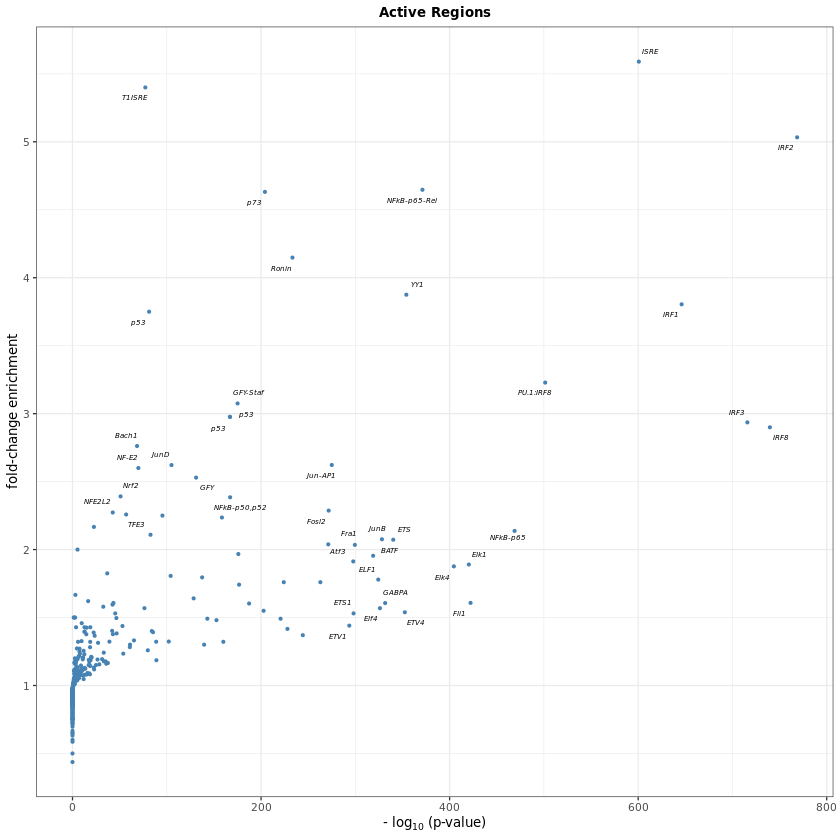

In [11]:
dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/AS-regions_motif-enrichment/GM12878inGM12878_active'

#Read in motif results txt files
active <- read_tsv(paste0(dir,"/knownResults.txt"), 
                   col_names=c("MotifName","Consensus","p","logp","q","numTarget", 
                               "percentTarget","numBackground","percentBackground"), 
                   skip = 1)

active_res <- format_motif_results(df=active)

active_res_text <- dplyr::filter(active_res, rank(logp) <= 25 | rank(dplyr::desc(percentFold)) <= 25)

active <- ggplot(active_res, aes(x=abs(as.numeric(logp)), y=percentFold)) + 
    geom_point(color="steelblue", size = 0.5) +
    geom_text_repel(data=active_res_text, aes(x=abs(as.numeric(logp)), y=percentFold, label = Motif), 
               size = 1.5, fontface = "italic", max.overlaps = getOption("ggrepel.max.overlaps", default = 45)) + 
    ggtitle("Active Regions") +
    labs(x = bquote("-"~log[10]~"(p-value)"), y = "fold-change enrichment") +
    theme_bw(base_size = 8) +
    theme(plot.title = element_text(hjust = 0.5, size = 8, face = "bold"))

active 

In [12]:
dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(paste0(dir, "/GM_active_motif.pdf"), active, device = cairo_pdf, width = 4, height = 3)


── Column specification ────────────────────────────────────────────────────────
cols(
  MotifName = col_character(),
  Consensus = col_character(),
  p = col_double(),
  logp = col_double(),
  q = col_double(),
  numTarget = col_double(),
  percentTarget = col_character(),
  numBackground = col_double(),
  percentBackground = col_character()
)


Warning message:
“Removed 1 rows containing missing values (geom_point).”


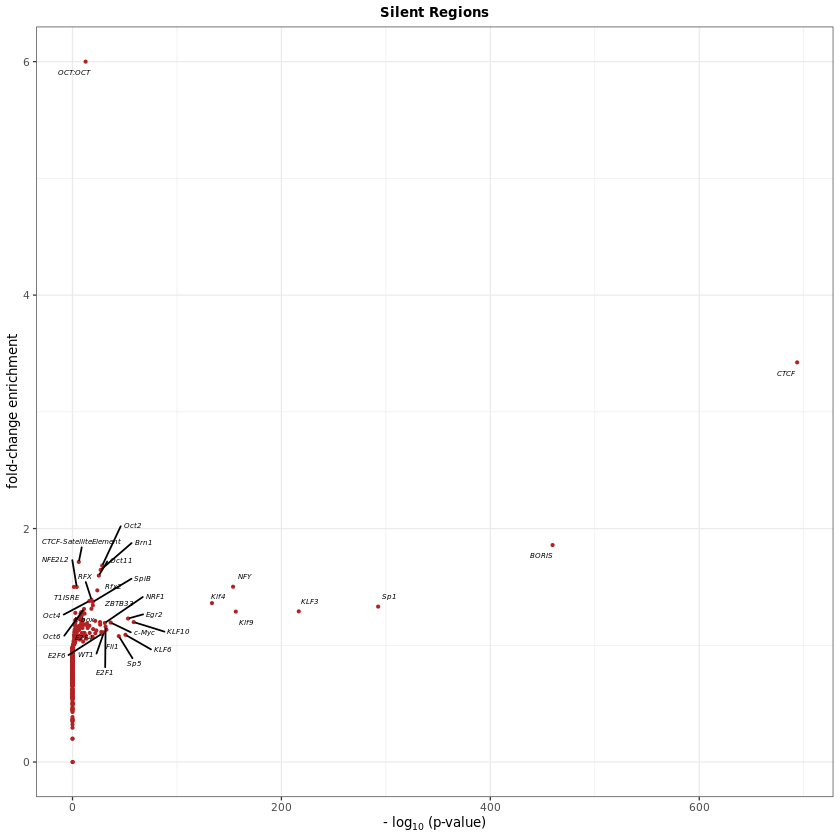

In [33]:
#silent
#Read in motif results txt files
dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/AS-regions_motif-enrichment/GM12878inGM12878_silent'

#Read in motif results txt files
silent <- read_tsv(paste0(dir,"/knownResults.txt"), 
                   col_names=c("MotifName","Consensus","p","logp","q","numTarget", 
                               "percentTarget","numBackground","percentBackground"), 
                   skip = 1)

silent_res <- format_motif_results(df=silent)

silent_res_text <- dplyr::filter(silent_res, rank(logp) <= 20 | rank(dplyr::desc(percentFold)) <= 20)

silent <- ggplot(silent_res, aes(x=abs(as.numeric(logp)), y=percentFold)) + 
    geom_point(color="firebrick", size = 0.5) +
    geom_text_repel(data=silent_res_text, aes(x=abs(as.numeric(logp)), y=percentFold, label = Motif), 
               size = 1.5, fontface = "italic", max.overlaps = getOption("ggrepel.max.overlaps", default = 20)) + 
    ggtitle("Silent Regions") +
    labs(x = bquote("-"~log[10]~"(p-value)"), y = "fold-change enrichment") +
    theme_bw(base_size = 8) +
    theme(plot.title = element_text(hjust = 0.5, size = 8, face = "bold"))

silent

In [34]:
dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(paste0(dir, "/GM_silent_motif.pdf"), silent, device = cairo_pdf, width = 4, height = 3)

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
